In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline
sns.set()

# ロジスティック回帰の復習

In [2]:
data1 = pd.read_csv('Lesson12-1.csv')
data1.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


<function matplotlib.pyplot.legend(*args, **kwargs)>

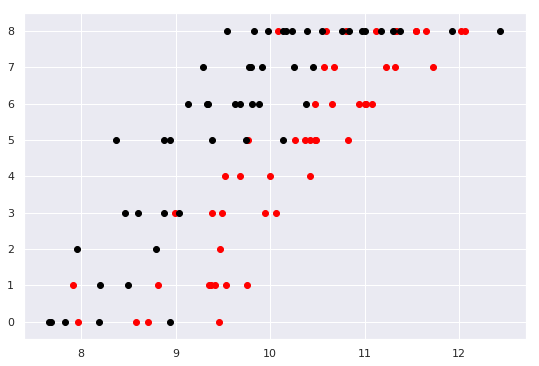

In [3]:
data1_C= data1.query('f == "C"')
data1_T= data1.query('f == "T"')

fig,ax = plt.subplots(1,1,figsize=(9,6))
plt.scatter(data1_C['x'], data1_C['y'], label='c', color='red')
plt.scatter(data1_T['x'], data1_T['y'], label='T', color='black')
plt.legend

In [4]:
# 発芽能力のない種子数のカラムnyを追加
data1['ny'] = data1['N']-data1['y']  

# パラメータの推定（応答変数y,ynを、説明変数x,fから予測するためのパラメータ）
model1 = smf.glm(formula='y+ny ~ x+f', 
                 data=data1,
                 family=sm.families.Binomial()
                ).fit(disp=0)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            ['y', 'ny']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Fri, 29 Nov 2019   Deviance:                       123.03
Time:                        12:29:09   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
f[T.T]         2.0215      0.231      8.740      0.000       1.568       2.475
x              1.9524      0.139     14.059      0.000       1.680       2.225
==============================================================================
"""

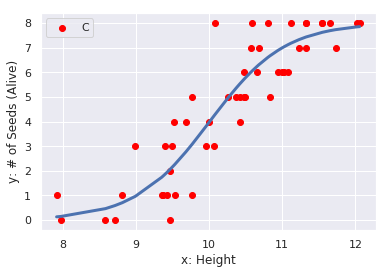

In [5]:
# 肥料なしの場合のモデルの精度

# data1_Cのxとfをモデルに入力し、予測結果をpred1に格納
data1_C = data1_C.sort_values('x')  #sort_valuesは昇順並べ替え（パラメータascending==Falseで降順
pred1 = model1.predict(data1_C.loc[:,['x','f']])

# 図12-1の散布図(Tのみ)にpred2を上書き
plt.scatter(data1_C['x'],data1_C['y'], label='C', color='red')
plt.plot(data1_C['x'], 8*pred1,lw=3)
plt.xlabel('x: Height')
plt.ylabel('y: # of Seeds (Alive)')
plt.legend()

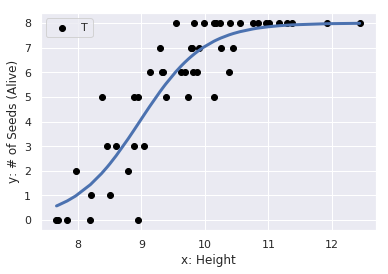

In [6]:
# 肥料ありの場合のモデルの精度

# data1_Tのxとfをモデルに入力し、予測結果をpred2に格納
data1_T = data1_T.sort_values('x')  #sort_valuesは昇順並べ替え（パラメータascending==Falseで降順
pred2 = model1.predict(data1_T.loc[:,['x','f']])

# 図12-1の散布図(Tのみ)にpred2を上書き
plt.scatter(data1_T['x'],data1_T['y'], label='T', color='black')
plt.plot(data1_T['x'], 8*pred2,lw=3)
plt.xlabel('x: Height')
plt.ylabel('y: # of Seeds (Alive)')
plt.legend()

# ベイズモデルとは

 ##### 事後分布 = (尤度 × 事前分布) / データが得られる確率

# GLMをベイズモデルとして扱うと

In [7]:
import pystan as ps

ModuleNotFoundError: No module named 'pystan'